In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import gymnasium as gym

from gumbo.env.gym import TorchEnv
from gumbo.defaults import default_ppo

In [ ]:
env = gym.make("LunarLander-v2")
env = TorchEnv(env)

In [ ]:
ppo = default_ppo(env)

In [4]:
log = ppo.train(1000000)

1001472it [05:26, 3067.40it/s]                            


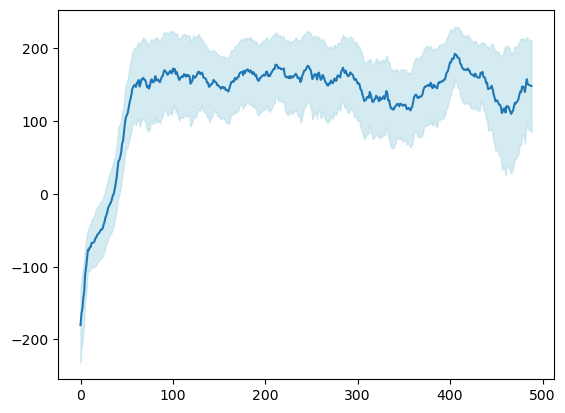

In [7]:
x = range(len(log.training_log))
y = log.training_log.rew
e = 0.5 * np.array(log.training_log.std)
sns.lineplot(x=x, y=log.training_log.rew)
plt.fill_between(x, y - e, y + e, color='lightblue', alpha=0.5)
plt.show()